## This file is for wnet evaluation for uadetrac
Steps:
    1. Train the model
    2. Run Testing on the model?? - What are some evaluation statistics we can generate?
    3. Move onto training the network for uadetrac - I wrote a script called WNet_uadetrac.py
   

In [1]:
from __future__ import print_function

%pylab inline
%load_ext autoreload
%autoreload 2

import tensorflow as tf
import numpy as np
import datetime
import sys, os
sys.argv=['']
sys.path.append('../../')
sys.path.append(os.path.realpath('./src/data_io'))

import eva_storage.external.wnet.chen_wnet_cp.src.TensorflowUtils as tensorflow_utils
from eva_storage.external.wnet.chen_wnet_cp.src.WNet_uadetrac import Wnet_uadetrac, create_uadetrac
from eva_storage.external.wnet.chen_wnet_cp.src.soft_ncut import soft_ncut, brightness_weight, gaussian_neighbor, convert_to_batchTensor
from eva_storage.external.wnet.chen_wnet_cp.src.data_io.BatchDatasetReader_UAD import create_BatchDataset

from loaders.uadetrac_loader import UADetracLoader

Populating the interactive namespace from numpy and matplotlib
Current directory is  /home/jbang36/eva/eva_storage/evaluation
appending chen_wnet_cp/src...


In [2]:
def tf_flags():
    FLAGS = tf.flags.FLAGS
    tf.flags.DEFINE_integer("batch_size", "5", "batch size for training")
    tf.flags.DEFINE_integer("image_size", "128", "batch size for training")
    tf.flags.DEFINE_integer('max_iteration', "100000", "max iterations")
    tf.flags.DEFINE_integer('decay_steps', "10000", "max iterations")
    tf.flags.DEFINE_integer('num_class', "21", "number of classes for segmentation")
    tf.flags.DEFINE_integer('num_layers', "5", "number of layers of UNet")
    tf.flags.DEFINE_string("cmap", "viridis", "color map for segmentation")
    tf.flags.DEFINE_string("logs_dir", "WNet_bright_UAD_logs/", "path to logs directory")
    tf.flags.DEFINE_string("test_dir", "data/test/", "path of test image")
    tf.flags.DEFINE_float("learning_rate", "5e-5", "Learning rate for Adam Optimizer")
    tf.flags.DEFINE_float("decay_rate", "0.5", "Decay rate of learning_rate")
    tf.flags.DEFINE_float("dropout_rate", "0.65", "dropout rate")
    tf.flags.DEFINE_bool('debug', "False", "Debug mode: True/ False")
    tf.flags.DEFINE_string('mode', "train", "Mode train/ test/ visualize")
    return FLAGS

In [3]:
flags = tf_flags()
net = Wnet_uadetrac(flags)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
This op will be removed after the deprecation date. Please switch to tf.sets.difference().
Setting up Session and Saver...
Initialize tf variables
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from WNet_bright_UAD_logs/model.ckpt-6000
Model restored...


In [4]:
loader = UADetracLoader()

In [4]:
## Train the network
train_dataset_reader, validation_dataset_reader = create_BatchDataset()

Number of files added:  10421
Initializing Batch Dataset Reader...
Initializing Batch Dataset Reader...


In [ ]:
net.train_net(train_dataset_reader, validation_dataset_reader)

Current directory is  /home/jbang36/eva/eva_storage/evaluation
appending chen_wnet_cp/src...
Step: 0, Train_loss:13554.7
2019-11-05 17:10:22.621732 ---> Validation_loss: 15487.3
Step: 100, Train_loss:2998.91
Step: 200, Train_loss:2889.48
Step: 300, Train_loss:2423.81
Step: 400, Train_loss:2311.35
Step: 500, Train_loss:2759.47
Step: 600, Train_loss:2246.5
Step: 700, Train_loss:2259.49
Step: 800, Train_loss:2624.25
Step: 900, Train_loss:1904.73
Step: 1000, Train_loss:2286.54
2019-11-05 17:29:38.998444 ---> Validation_loss: 2010.28
Step: 1100, Train_loss:1782.99
Step: 1200, Train_loss:1894.23
Step: 1300, Train_loss:1608.36
Step: 1400, Train_loss:1430.35
Step: 1500, Train_loss:1453.16
Step: 1600, Train_loss:1459.17
****************** Epochs completed: 1******************
Step: 1700, Train_loss:1396.17
Step: 1800, Train_loss:1290.81
Step: 1900, Train_loss:1367.12
Step: 2000, Train_loss:1242.13
2019-11-05 17:48:37.521473 ---> Validation_loss: 1004.8
Instructions for updating:
Use standard fi

In [8]:
### I need to do predictions on the images
### Then I need to save those images to perform filtering

## load the model in the correct directory
# net = WNet_uadetrac(flags)

In [5]:
images_resized = loader.load_images(image_size = 128)

Number of files added:  10421


In [7]:
image_save_dir = 'data/image_original.npy'
np.save(image_save_dir, images_resized)

In [8]:
images_resized.shape

(10421, 128, 128, 3)

In [22]:
batch_size = 24
predicted_images = np.ndarray(shape = (images_resized.shape[0], images_resized.shape[1], images_resized.shape[2]))
print(predicted_images.shape)
n_samples = images_resized.shape[0]
n_chunks = int(n_samples / batch_size)
for i in range(n_chunks):
    output = net.predict_segmentation(images_resized[i*batch_size:(i+1)*batch_size])
    predicted_images[i*batch_size:(i+1)*batch_size] = output
#we must predict the leftover images
predicted_images[batch_size * n_chunks:] = net.predict_segmentation(images_resized[batch_size * n_chunks:])


In [45]:
## save the results
save_dir = 'data/image_segmented.npy'
np.save(save_dir, predicted_images)

In [9]:
save_dir = 'data/image_segmented.npy'
predicted_images = np.load(save_dir)
print(predicted_images.shape)

(10421, 128, 128)


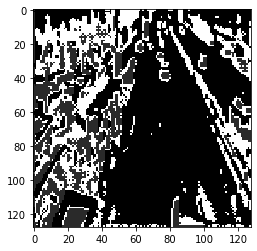

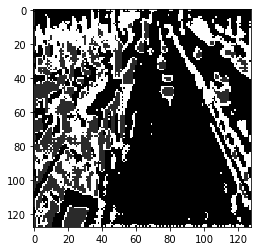

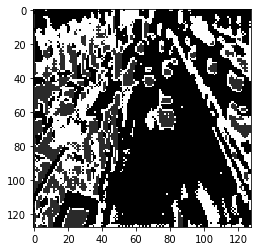

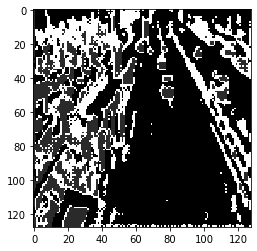

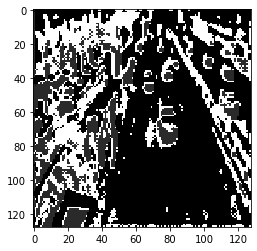

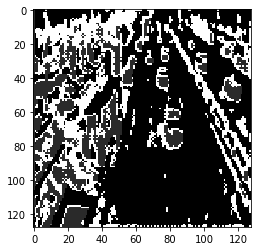

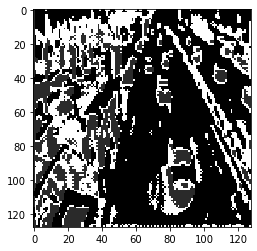

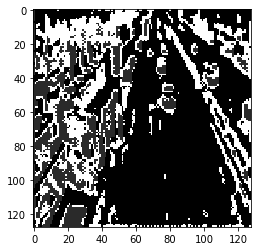

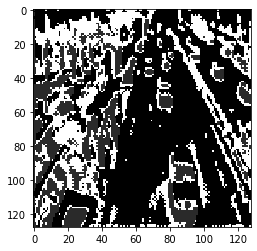

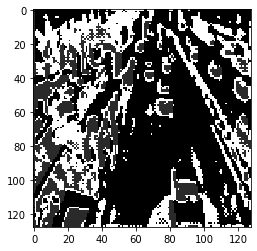

In [25]:
## visualize the output
import random
for i in range(10):
    random_int = random.randint(0,100)
    plt.imshow(predicted_images[random_int], cmap = 'gray')
    plt.show()

In [28]:
predicted_images[0].shape

(128, 128)

In [31]:
a = [1,2,3,4,5]
a.index(5)

4

In [37]:
## find the distribution of the image

numbers = []
frequencies = []
rows, cols = predicted_images[0].shape
predicted_image = predicted_images[0]

for k in range(10):
    numbers = []
    frequencies = []
    rand_int = random.randint(0,2000)
    predicted_image = predicted_images[rand_int]
    for i in range(rows):
        for j in range(cols):
            if predicted_image[i][j] not in numbers:
                numbers.append(predicted_image[i][j])
                frequencies.append(1)
            else:
                index = numbers.index(predicted_image[i][j])
                frequencies[index] += 1
            
    print(numbers)
    print(frequencies)
    print("----------")

[10.0, 8.0, 20.0, 9.0, 13.0]
[3037, 8542, 4800, 4, 1]
----------
[10.0, 8.0, 20.0, 9.0, 13.0]
[2443, 9581, 4355, 4, 1]
----------
[8.0, 20.0, 10.0, 9.0, 13.0]
[11043, 3736, 1601, 3, 1]
----------
[10.0, 8.0, 20.0, 9.0]
[2367, 9761, 4254, 2]
----------
[10.0, 8.0, 20.0, 9.0]
[2936, 8654, 4787, 7]
----------
[8.0, 20.0, 10.0, 9.0]
[8133, 4866, 3379, 6]
----------
[8.0, 20.0, 10.0, 9.0]
[9872, 3565, 2944, 3]
----------
[10.0, 8.0, 20.0, 9.0]
[3137, 8398, 4845, 4]
----------
[10.0, 8.0, 20.0, 9.0]
[2696, 8844, 4841, 3]
----------
[8.0, 20.0, 10.0, 9.0, 13.0]
[9106, 4050, 3222, 5, 1]
----------


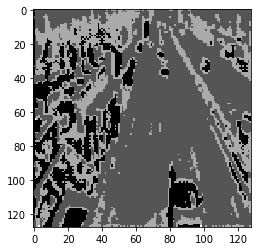

In [34]:
modified_image = np.ndarray(shape = predicted_image.shape)
for i in range(rows):
    for j in range(cols):
        index = numbers.index(predicted_image[i][j])
        modified_image[i][j] = 255 * index / 3

plt.imshow(modified_image, cmap = 'gray')

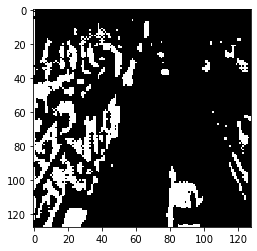

In [40]:
## one way to approach making boxes around these things is if we do it by number??
## 10 seems to be number related to moving objects

model_output = np.zeros(predicted_images.shape)
n_samples, rows, cols = model_output.shape
model_output[predicted_images == 10] = 255

plt.imshow(model_output[0], cmap = 'gray')
    

In [41]:
test_images = images_resized.astype(np.uint8)
model_output = model_output.astype(np.uint8)

In [45]:

## apply post processing techniques found in eva/eva_storage/patch_final.ipynb
import utils

# let's work on our own post method... enlarge the white area and take away things that are not 'bright enough'
rows = 5
cols = 9
size = 30
fig, axes = plt.subplots(rows, cols, figsize = (size*cols, size*rows), sharex = True, sharey = True)
for ii in range(rows):
    ri = random.randint(0, 100)
    tmp = test_images[ri]
    tmp_seg = model_output[ri]

    labels, results = utils.post_individual_v3(tmp_seg)
    assert(len(labels) == len(results))
    print(labels)

    end_index = min(cols - 3, len(results))
    
    for i in range(end_index):
        axes[ii,i].imshow(results[i], cmap = 'gray')

    
    #overlap the image
    post = results[-1]
    patches = utils.detect_patches(post)
    detected_img = utils.draw_patch(tmp, patches)
    axes[ii,end_index].imshow(detected_img)
    
    overlapped = utils.overlap1(tmp, post)
    axes[ii,end_index + 1].imshow(overlapped)
    
    detected_img = utils.draw_patches(tmp, patches)
    axes[ii,end_index + 2].imshow(detected_img)
    
    ### Let's do box filtering!! TODO!!!!
    ## 1. If box is too small, then exclude it
    ## 2. If the box aspect ratio is bad ( too horizontal, then exclude)
    new_patches = utils.filter_patches(patches)
    detected_img = utils.draw_patches(tmp, new_patches)
    axes[ii,end_index + 3].imshow(detected_img)

    
    

['median blur', 'dilation', 'ostu on median', 'otsu after dilation']
['median blur', 'dilation', 'ostu on median', 'otsu after dilation']
['median blur', 'dilation', 'ostu on median', 'otsu after dilation']
['median blur', 'dilation', 'ostu on median', 'otsu after dilation']
['median blur', 'dilation', 'ostu on median', 'otsu after dilation']


In [46]:
### let's do evaluation!!!

## let's do evaluation
## 1. Extract the boxes and save them
## 2. Use precision / recall methods implemented

n_test_samples = test_images.shape[0]
proposed_boxes = []
for i in range(n_test_samples):
    tmp = test_images[i]
    tmp_seg = model_output[i]

    labels, results = utils.post_individual_v3(tmp_seg)
    assert(len(labels) == len(results))
    
    post = results[-1]
    patches = utils.detect_patches(post)
    
    ### Let's do box filtering!! TODO!!!!
    ## 1. If box is too small, then exclude it
    ## 2. If the box aspect ratio is bad ( too horizontal, then exclude)
    new_patches = utils.filter_patches(patches)
    new_patches = utils.cv2ml_patches(patches)
    ## Check if the new_patches are according to our specification
    
    proposed_boxes.append(new_patches)


In [47]:
len(proposed_boxes)

10421

In [20]:
home_dir = os.path.abspath('../../')
anno_dir = os.path.join(home_dir, "data", "ua_detrac", "small-annotations")
boxes_dataset = get_boxes(anno_dir, width = 128, height = 128)
train_index_end = int(len(images_resized) * 0.8)
test_boxes = boxes_dataset[train_index_end:]
print(len(test_boxes))

skipping .ipynb_checkpoints
2085


In [22]:
test_boxes = boxes_dataset

In [55]:
precision, recall = corloc(test_boxes, proposed_boxes, iou = 0.5)
print(precision, recall)

true positive 6147
false positive 91827
false negative 107579
0.06274113540327025 0.05405096459912421


In [49]:
# filter the recall results
filtered_test_boxes = filter_ground_truth(test_boxes)

precision, recall = corloc(filtered_test_boxes, proposed_boxes, iou = 0.5)
print(precision, recall)

true positive 3201
false positive 94773
false negative 9136
0.032671933370077774 0.2594634027721488
